In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import GRU,Dense,Embedding,Dropout
from tensorflow.keras.models import Sequential
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=5000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing import sequence
MAX_LEN = 1000
X_train = sequence.pad_sequences(X_train,MAX_LEN)
X_test = sequence.pad_sequences(X_test,MAX_LEN)

In [3]:
X_train[:2]

array([[  0,   0,   0, ...,  19, 178,  32],
       [  0,   0,   0, ...,  16, 145,  95]], dtype=int32)

In [4]:
# Modelo GRU
# Generamos el modelo
model = Sequential()

# Definimos capa de Embedding
model.add(Embedding(input_dim = 5000, output_dim = 100, input_length=MAX_LEN))

# Definimos la arquitectura de la LSTM
model.add(GRU(units = 100))

# Apagamos en cada iteracción un 20% de las neuronas para evitar el sobreajuste
model.add(Dropout(rate=0.2))

# Capa de salida
model.add(Dense(units=1, activation="sigmoid")) # La salida es de dimensión 1, 0 o 1

# Definimos función de pérdida y optimizador
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
%%time
model_hist = model.fit(x=X_train,y=y_train,batch_size=1024,epochs=15)

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 282ms/step - accuracy: 0.5578 - loss: 0.6840
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 288ms/step - accuracy: 0.7270 - loss: 0.5498
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 282ms/step - accuracy: 0.7549 - loss: 0.5056
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 283ms/step - accuracy: 0.8070 - loss: 0.4236
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 287ms/step - accuracy: 0.8624 - loss: 0.3289
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 290ms/step - accuracy: 0.8797 - loss: 0.2902
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 290ms/step - accuracy: 0.9051 - loss: 0.2390
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 291ms/step - accuracy: 0.9173 - loss: 0.2151
Epoch 9/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 292ms/step - accuracy: 0.9314 - loss: 0.1872
Epoch 10/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 295ms/step - accuracy: 0.9357 - loss: 0.1763
Epoch 11/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 296ms/step - accuracy: 0.9287 - loss: 0.1934
Epoch 12/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 

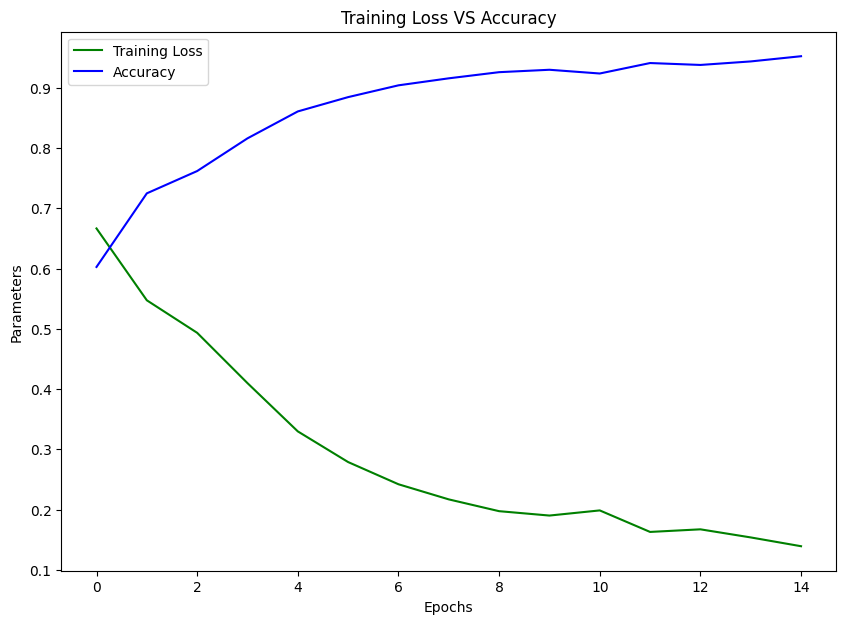

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(model_hist.history['loss'], label = 'Training Loss', color = 'green')
plt.plot(model_hist.history['accuracy'], label = 'Accuracy', color = 'blue')
plt.title("Training Loss VS Accuracy")
plt.xlabel("Epochs")
plt.ylabel('Parameters')
plt.legend()
plt.show()

In [9]:
%%time
scores = model.evaluate(x=X_test,y=y_test)
print("Accuracy en test",round(scores[1]*100,2),"%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8570 - loss: 0.4006
Accuracy en test 85.87 %
CPU times: user 11.3 s, sys: 383 ms, total: 11.6 s
Wall time: 11.5 s
